# Data Analysis Project: E-commerce-public-dataset
- Name:Dwiky Yudha Prasetya
- Email: dwiky.yudh@gmail.com
- Dicoding ID: dwikyyudhap

## Defining Business Questions

- What are the top five most significant demographic segments of customers, categorized by state?
- What are the most and least sold products category?
- When did the customer last make a transaction?
- How often has a customer made a purchase in the last few months?
- How much money did the customer spend in the last few months?

## Preparing All Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

- To answer the first question, we will load Customer Dataset
- To answer the second question, we will load multiple Dataset such as Order Items Dataset, Products Dataset, and Product Category Name Translation Dataset

### Gathering Data

#### 1. Customers Dataset

##### Load Customers Dataset

In [2]:
customers_df = pd.read_csv("E-commerce-public-dataset\customers_dataset.csv")

#### 2. Order Items Dataset

##### Load Order Items Dataset

In [3]:
order_items_df = pd.read_csv(r"E-commerce-public-dataset\order_items_dataset.csv")

#### 3. Products Dataset

##### Load Products Dataset

In [4]:
products_df = pd.read_csv(r"E-commerce-public-dataset\products_dataset.csv")

#### 4. Product Category Name Translation Dataset

##### Load Product Category Name Translation Dataset

In [5]:
product_category_name_translation_df = pd.read_csv(r"E-commerce-public-dataset\product_category_name_translation.csv")

#### 5. Product Orders Dataset

##### Load Orders Dataset

In [6]:
orders_df = pd.read_csv("E-commerce-public-dataset\orders_dataset.csv")

### Assessing Data

"In the 'Assessing Data' step, we will conduct a comprehensive examination of all the datasets that we have previously loaded. This process will involve:
- Reviewing data information.
- Identifying missing values.
- Detecting duplicate entries.
- Addressing other relevant items.

#### 1. Customers Dataset

##### Checking Customers Dataset Information

In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In **Customers Dataset**, we will only use column to answer business questions: 
- `customer_id`
- `customer_zip_code_prefix`
- `customer_city`
- `customer_state`

##### Total Duplicated Records in Customers Dataset

In [8]:
print("Total Duplicated Records in Customers Dataset:", customers_df.duplicated().sum())

Total Duplicated Records in Customers Dataset: 0


##### Missing Values in Customers Dataset

In [9]:
print("Missing values from each column in customers_df")
customers_df.isnull().sum()

Missing values from each column in customers_df


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### 2. Order Dataset

##### Checking Order Items Dataset Information

In [10]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


The "shipping_limit_date" column uses the object data type, but it doesn't matter because the "shipping_limit_date" column will not be used to answer business questions.

In **Order Items Dataset**, we will only use column to answer business questions: 
- `product_id`
- `order_id`
- `order_item_id`
- `price`
- `freight_value`

##### Total Duplicated Records in Order Items Dataset

In [11]:
print("Total Duplicated Records in Order Items Dataset:",  order_items_df.duplicated().sum())

Total Duplicated Records in Order Items Dataset: 0


##### Missing Values in Order Items Dataset

In [12]:
print("Missing values from each column order_items_df")
order_items_df.isnull().sum()

Missing values from each column order_items_df


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### 3. Products Dataset

##### Checking Products Dataset Information

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In **Products Dataset**, we will only use column to answer business questions: 
- `product_id`
- `product_category_name`

##### Total Duplicated Records in Products Dataset

In [14]:
print("Total Duplicated Records in Products Dataset:",  products_df.duplicated().sum())

Total Duplicated Records in Products Dataset: 0


##### Missing Values in Products Dataset

In [15]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Check percentage missing value in "product category name" column.

In [16]:
print("Percentage missing value in 'product category name' column:", products_df['product_category_name'].isnull().sum() / products_df.shape[0] * 100, "%")

Percentage missing value in 'product category name' column: 1.8512336499650999 %


##### Count Number Unique Product Categories

In [17]:
print("Total Unique Product Categories:", products_df['product_category_name'].value_counts().count())

Total Unique Product Categories: 73


#### 4. Product Category Name Translation Dataset

##### Checking Product Category Name Translation Dataset Information

In [18]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In **Product Category Name Translation Dataset**, we will use the following columns to answer business questions: 
- `product_category_name`
- `product_category_name_english`

**Product Category Name Translation Dataset** will be used to translate product column in the other dataset.

##### Total Duplicated Records in Product Category Name Translation Dataset

In [19]:
print("Total Duplicated Records in Product Category Name Translation Dataset:",  product_category_name_translation_df.duplicated().sum())

Total Duplicated Records in Product Category Name Translation Dataset: 0


##### Missing Values in Product Category Name Translation Dataset

In [20]:
product_category_name_translation_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### 5. Orders Dataset

##### Checking Orders Dataset Information

In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In **Orders Dataset**, we will use the following columns to answer business questions: 
- `order_id`
- `order_purchase_timestamp`

The data type of `order_purchase_timestamp` is not yet in datetime. So, we will change it later.

##### Total Duplicated Records in Orders Dataset

In [22]:
print("Total Duplicated Records in Orders Dataset:",  orders_df.duplicated().sum())

Total Duplicated Records in Orders Dataset: 0


##### Missing Values in Orders Dataset

In [23]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Assessing Summary

| Data                              | Data Type                  | Missing Values      | Duplicate Data      | Inaccurate Values   |
|-----------------------------------|----------------------------|---------------------|---------------------|---------------------|
| customers_df                      | -                          | -                   | -                   | -                   |
| order_items_df                    | -                          | -                   | -                   | -                   |
| products_df                       | -                          | 610 missing value in product_category_name                 | -                   | -                   |
| product_category_name_translation_df | -                      | -                   | -                   | -                   |
| orders_df                 | order_purchase_timestamp (datetime) | -            | -                   | -                   |

### Cleaning Data

##### Change Data Type

In [24]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


#### Handle Missing Value

Because percentage missing value in `product_category_name` column is relatively small, only 1.8512336499650999 % and then I just use 2 column from Products Dataset. So, I think if I drop the missing value in that column, It will be fine.

In [25]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [26]:
products_df_with_na_dropped = products_df.dropna()
products_df_with_na_dropped.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Define New DataFrame as Needed

##### Define new Customers Dataset as needed to answer business questions

In [27]:
customers_df2 = customers_df.loc[:, ['customer_id', 'customer_zip_code_prefix','customer_city', 'customer_state']]

##### Define new Order Items Dataset as needed to answer business questions

In [28]:
order_items_df2 = order_items_df.loc[:, ['order_id', 'order_item_id', 'product_id', 'price', 'freight_value']]

##### Define new Products Dataset as needed to answer business questions

In [29]:
products_df2 = products_df_with_na_dropped.loc[:, ['product_id','product_category_name']]

In [30]:
products_df2.nunique()

product_id               32340
product_category_name       73
dtype: int64

In [31]:
products_df2.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

There are 73 unique product categories listed in the `product_category_name` column, and there are no missing values. Our objective is to translate the values in the `product_category_name` column to their corresponding values in the `product_category_name_english` column using the information provided in the `product_category_name_translation_df` dataset.

In [32]:
product_category_name_translation_df.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

The `product_category_name_translation_df` dataset consists of a total of 71 English product category names. Consequently, there are 2 categories that lack English translations. It is our responsibility to address this issue manually in order to ensure data completeness.

In [33]:
products_df2_after_translated = pd.merge(
    left=products_df2, 
    right=product_category_name_translation_df, 
    on='product_category_name', 
    how='left'
)
products_df2_after_translated.sample(3)

,product_id,product_category_name,product_category_name_english
10368,eb4ce1251cfec891df49b09dda5095b0,alimentos,food
23347,b9e247fc923da7d723c2545b76efe01e,cool_stuff,cool_stuff
19057,958cd4fc82ce0223c757f47bc9d67e23,automotivo,auto


The total count of missing values is obtained after performing a left merge operation.

In [34]:
products_df2_after_translated.isnull().sum()

product_id                        0
product_category_name             0
product_category_name_english    13
dtype: int64

Here is the breakdown of the total missing values for each value after the left merge.

In [35]:
products_df2_after_translated[products_df2_after_translated['product_category_name_english'].isnull()]['product_category_name'].value_counts()

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

The translation of "portateis_cozinha_e_preparadores_de_alimentos" to English is "kitchen_and_food_preparators_portables."

In [36]:
products_df2_after_translated.loc[products_df2_after_translated['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen_and_food_preparators_portables' 

In [37]:
products_df2_after_translated.isnull().sum()

product_id                       0
product_category_name            0
product_category_name_english    3
dtype: int64

Similarly, the translation of "pc_gamer" to English remains as "pc_gamer."

In [38]:
products_df2_after_translated.loc[products_df2_after_translated['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer' 

In [39]:
products_df2_after_translated.isnull().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

In [40]:
products_df2_after_translated.drop(columns='product_category_name', inplace=True)

In [41]:
products_df2_after_translated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32340 non-null  object
 1   product_category_name_english  32340 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


##### Define New DataFrame combined order_items_df2 and products_df2_after_translated

In [42]:
data_transaction_df = pd.merge(
    left=order_items_df2,
    right=products_df2_after_translated,
    on='product_id',
    how='left'
)
data_transaction_df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english    1604
dtype: int64

In [43]:
data_transaction_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [44]:
data_transaction_df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name_english    1604
dtype: int64

We will fill the missing value with "unknown_category"

In [45]:
data_transaction_df['product_category_name_english'].fillna('unknown_category', inplace=True)

In [46]:
# Check again the missing value
data_transaction_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_category_name_english    0
dtype: int64

In [47]:
# Rename product_category_name_english column to product_category_name
data_transaction_df.rename(columns={
    "product_category_name_english": "product_category_name"
}, inplace=True)

In [48]:
data_transaction_df.duplicated().sum()

0

In [49]:
data_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   order_item_id          112650 non-null  int64  
 2   product_id             112650 non-null  object 
 3   price                  112650 non-null  float64
 4   freight_value          112650 non-null  float64
 5   product_category_name  112650 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
all_order = pd.merge(
    left=orders_df,
    right=order_items_df2,
    on='order_id',
    how='right'
)
all_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  object        
 6   order_delivered_customer_date  110196 non-null  object        
 7   order_estimated_delivery_date  112650 non-null  object        
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  price                          112650 non-null  float64       
 11  

In [51]:
all_order_with_customer = pd.merge(
    left=customers_df2,
    right=all_order,
    on='customer_id',
    how='right'
)
all_order_with_customer.isnull().sum()

customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
dtype: int64

In [52]:
all_data = pd.merge(
    left=data_transaction_df,
    right=all_order_with_customer,
    on=['order_id', 'order_item_id', 'product_id', 'price', 'freight_value'],
    how='left'
)
all_data.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
product_category_name               0
customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [53]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   price                          112650 non-null  float64       
 4   freight_value                  112650 non-null  float64       
 5   product_category_name          112650 non-null  object        
 6   customer_id                    112650 non-null  object        
 7   customer_zip_code_prefix       112650 non-null  int64         
 8   customer_city                  112650 non-null  object        
 9   customer_state                 112650 non-null  object        
 10  order_status                   112650 non-null  object        
 11  

In [54]:
all_data.drop(all_data.iloc[:, 12:16], inplace=True, axis=1)

## Exploratory Data Analysis (EDA)

### Exploration all_data

In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   price                     112650 non-null  float64       
 4   freight_value             112650 non-null  float64       
 5   product_category_name     112650 non-null  object        
 6   customer_id               112650 non-null  object        
 7   customer_zip_code_prefix  112650 non-null  int64         
 8   customer_city             112650 non-null  object        
 9   customer_state            112650 non-null  object        
 10  order_status              112650 non-null  object        
 11  order_purchase_timestamp  112650 non-null  datetime64[ns]
dtypes:

The `all_data` dataset contains several columns. We will focus on two of these columns, namely `customer_id` and `customer_state`. Through these columns, we can gain insights into the demographic distribution of our customers.

In [56]:
total_countries = all_data.groupby(by='customer_state').customer_id.nunique().count()
print("Total countries:", total_countries)

Total countries: 27


In the `customers_df2` dataset, there are records for 27 states related to the demographic characteristics of the customers.

Now, I would like to examine the dataset and identify the top five states based on the count of customers in each state.

In [57]:
top_5_states_df = all_data.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index().head(5)
top_5_states_df

,customer_state,customer_id
0,SP,41375
1,RJ,12762
2,MG,11544
3,RS,5432
4,PR,4998


In [58]:
all_data.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,35119.309090
std,0.705124,183.633928,15.806405,29866.120801
min,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,39.900000,13.080000,11310.000000
50%,1.000000,74.990000,16.260000,24340.000000
75%,1.000000,134.900000,21.150000,59028.750000
max,21.000000,6735.000000,409.680000,99990.000000


**Average Price and Delivery**: 
- The average price of an order is approximately 120.65 dolar
- The average shipping cost is approximately 19.99 dolar

**Data Variability**:
- The standard deviation of price (183.63) and shipping cost (15.81) is quite high, indicating significant variation in price and shipping cost between orders. This may indicate variations in the types of products sold or perhaps in the delivery locations.

**Price and Shipping Cost Range**: 
- Product prices range from 0.85 dolar to 6735 dolar, while shipping costs range from 0 dolar to 409.68 dolar. This range shows a large variation in price and shipping cost from the lowest to the highest order. There are orders with zero shipping costs (minimum 0.0). This could be an indication of a free shipping method or a special promotion applied to some orders.

**Order Item Distribution**: 
- From the quartile values (25%, 50%, 75%), it can be seen that most orders have only one item (25%, 50%, and 75% at value 1.0 for order_item_id). This indicates that most customers order one item per order.

In [59]:
all_data.groupby(by=["product_category_name"]).agg({
    "product_id": "nunique",
    "price":  ["min", "max"],
    "freight_value":  ["min", "max"]
}).reset_index()

product_category_name product_id  price          freight_value  \
                                  nunique    min      max           min   
0   agro_industry_and_commerce         74  12.99  2990.00          7.39   
1             air_conditioning        124  10.90  1599.00          6.58   
2                          art         55   3.50  6499.00          7.39   
3        arts_and_craftmanship         19   9.80   289.49          7.39   
4                        audio         58  14.90   598.99          4.25   
..                         ...        ...    ...      ...           ...   
69      tablets_printing_image          9  14.90   889.99          1.71   
70                   telephony       1134   5.00  2428.00          0.01   
71                        toys       1411   4.90  1699.99          0.01   
72            unknown_category        611   3.00  3980.00          0.00   
73               watches_gifts       1329   8.99  3999.90          0.00   

            
       max  
0   194.55  
1   115.43  
2   227.66  
3    68.72  
4    52.67  
..     ...  
69   34.49  
70  121.22  
71  193.76  
72  162.08  
73  209.63  

[74 rows x 6 columns]

In [60]:
df = all_data.groupby('product_category_name')['order_item_id'].sum().sort_values(ascending=False)
df

product_category_name
bed_bath_table               13665
furniture_decor              11540
health_beauty                11081
sports_leisure                9932
computers_accessories         9874
                             ...  
la_cuisine                      16
cds_dvds_musicals               16
pc_gamer                        11
fashion_childrens_clothes        8
security_and_services            2
Name: order_item_id, Length: 74, dtype: int64

In [61]:
most_sold_category = df.idxmax()
least_sold_category = df.idxmin()

In [62]:
print(f"The category that recorded the highest number of sales is {most_sold_category} with a total of {df.max()} products sold.")
print(f"The category with the lowest sales is {least_sold_category} having only {df.min()} products sold.")

The category that recorded the highest number of sales is bed_bath_table with a total of 13665 products sold.
The category with the lowest sales is security_and_services having only 2 products sold.


In [63]:
rfm_df = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #max_order_timestamp
    "order_id": "nunique", #frequency
    "price": "sum" #monetary
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data["order_purchase_timestamp"].dt.date.max() 
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days) #days
rfm_df

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,154
...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17,1,78.00,170
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29,1,54.90,158
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22,1,47.90,104
98664,ffff42319e9b2d713724ae527742af25,2018-06-13,1,199.90,82


Is it only 1 frequency order for each customer?

In [64]:
rfm_df['frequency'].value_counts()

1    98666
Name: frequency, dtype: int64

Yes, all customers only make a one-time purchase during the specific time period analyzed.

In [65]:
rfm_df.describe()
rfm_df['monetary'].mean() 

137.7540763788945

What percentage of customers made purchases above the average value in the monetary data?

In [66]:
monetary_mean = rfm_df['monetary'].mean()
percentage_above_mean = ((rfm_df['monetary'] > monetary_mean).sum() / rfm_df.shape[0]) * 100

sentence = "The average monetary value in the dataset is {:.2f}. Additionally, around {:.2f}% of the records have a monetary value higher than the mean.".format(monetary_mean, percentage_above_mean)
print(sentence)

The average monetary value in the dataset is 137.75. Additionally, around 29.28% of the records have a monetary value higher than the mean.


The percentage of customers who made purchases above the average value is about 29.28%. This means that almost 29.28% of the total customers have made purchases with a value that exceeds the average transaction value. This insight indicates that most customers have purchases that are lower than the average value.

In [67]:
min_date = rfm_df['max_order_timestamp'].min()
max_date = rfm_df['max_order_timestamp'].max()

sentence = f"The time range in the RFM dataset spans from {min_date} to {max_date}."
print(sentence)

The time range in the RFM dataset spans from 2016-09-04 to 2018-09-03.


## Visualization & Explanatory Analysis

### Question 1: What are the top five most significant demographic segments of customers, categorized by state?

We aim to identify the top five most significant demographic segments of customers, categorized by state. To simplify the communication of this information, it is essential to create data visualizations in the form of bar charts. 

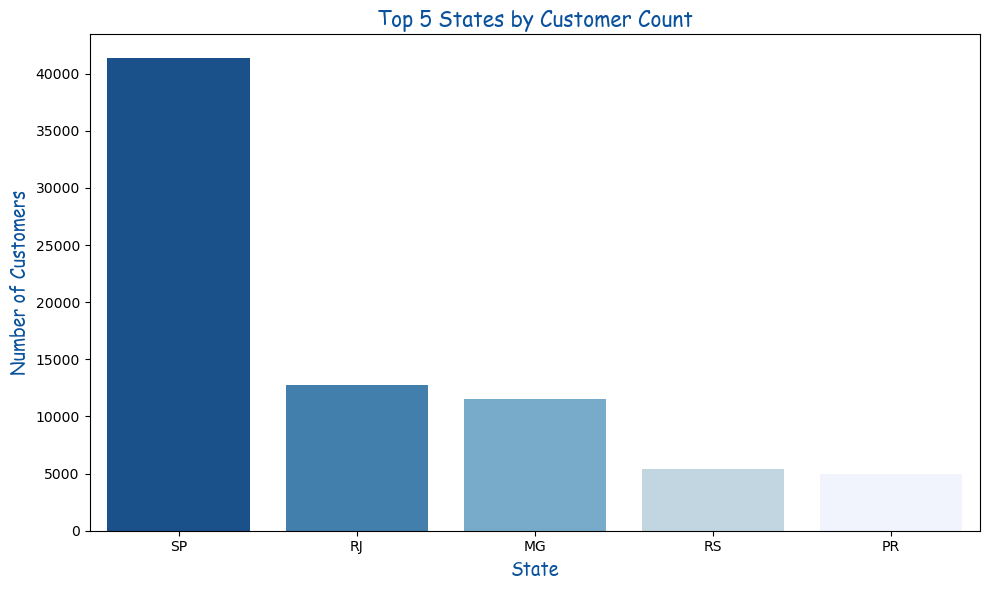

In [68]:
# List of colors to be used in the plot
colors = ['#08519c', '#3182bd', '#6baed6', '#bdd7e7', '#eff3ff']

# Creating a figure with dimensions 10x6 inches
plt.figure(figsize=(10, 6))

# Creating a bar plot using seaborn
sns.barplot(
    x="customer_state", 
    y="customer_id", 
    data=top_5_states_df,
    palette=colors
)

# Font settings for the plot title
font = {'family': 'cursive',
        'color':  '#08519c',
        'weight': 'normal',
        'size': 13,
        }

# Adding a title to the plot
plt.title("Top 5 States by Customer Count", fontsize=15, fontdict=font)

# Adding labels to the x and y axes
plt.xlabel("State", fontdict=font)
plt.ylabel("Number of Customers", fontdict=font)

# Adjusting the plot layout for neatness
plt.tight_layout()


The provided figure offers a clear overview of the five most significant demographic segments of customers categorized by state in Brazil. These segments are associated with the following state abbreviations:

1. SP: São Paulo
2. RJ: Rio de Janeiro
3. MG: Minas Gerais
4. RS: Rio Grande do Sul
5. PR: Paraná

This visualization serves to highlight the most influential customer segments across different states. By understanding the distribution of these segments, we can gain insights into regional customer preferences and tailor our strategies accordingly.

### Question 2: What are the most and least sold products category?

We aim to identify the products with the highest and lowest sales. To simplify the communication of this information, it is essential to create data visualizations in the form of bar charts. Additionally, in order to facilitate others in recognizing products with the best and worst performance, we need to incorporate two sets of data visualizations within a single visual image. To achieve this, the subplot() function can be utilized. The following is an example code snippet for its implementation. Subsequently, the next step naturally involves populating these empty canvases with the appropriate bar charts.

To accomplish this, naturally we need to create a new DataFrame to store information regarding the sales quantity for each category.

In [79]:
df_v = all_data.groupby('product_category_name')['order_item_id'].sum().sort_values(ascending=False).reset_index()
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_name  74 non-null     object
 1   order_item_id          74 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


Text(0.5, 0.98, 'Best and Worst Performing Product Categories by Number of Sales')

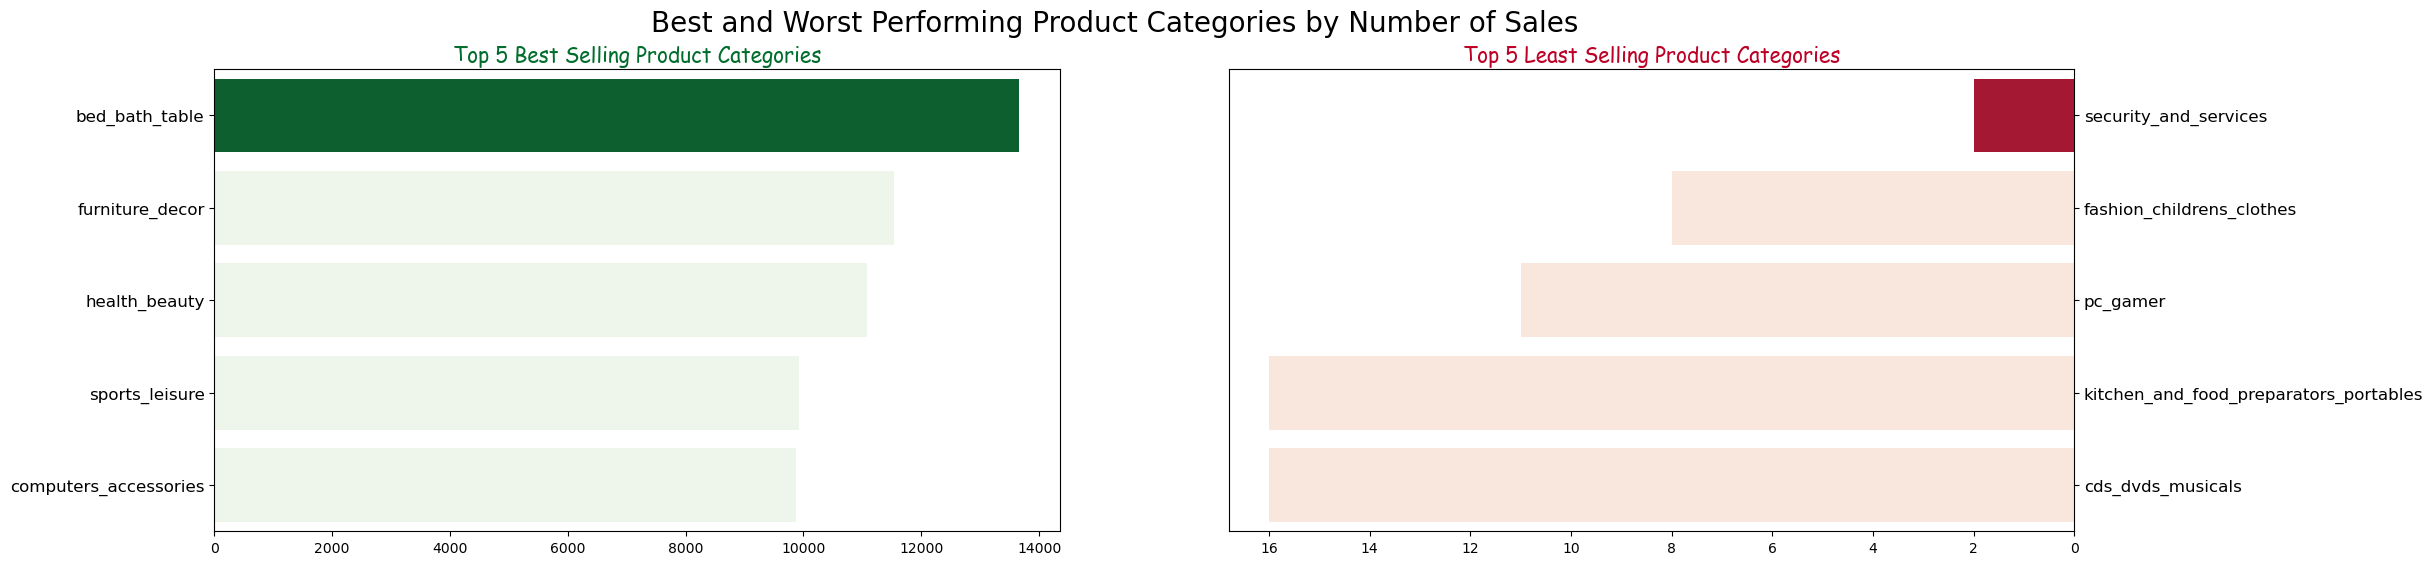

In [70]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define colors
colors1 = ['#006d2c','#edf8e9','#edf8e9','#edf8e9','#edf8e9']
colors2 = ['#bd0026','#fee5d9','#fee5d9','#fee5d9','#fee5d9']

# Font settings for the plot title
font1 = {'family': 'cursive',
        'color':  '#006d2c',
        'weight': 'normal',
        'size': 15,
        }

font2 = {'family': 'cursive',
        'color':  '#bd0026',
        'weight': 'normal',
        'size': 15,
        }

# Plot the best performing products
sns.barplot(x='order_item_id', y='product_category_name', data=df_v.head(5), palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Best Selling Product Categories", loc="center", fontsize=15, fontdict=font1)
ax[0].tick_params(axis ='y', labelsize=12)

# Plot the worst performing products
sns.barplot(x='order_item_id', y='product_category_name', data=df_v.sort_values(by="order_item_id", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Top 5 Least Selling Product Categories", loc="center", fontsize=15, fontdict=font2)
ax[1].tick_params(axis='y', labelsize=12)

# Set the overall title
plt.suptitle("Best and Worst Performing Product Categories by Number of Sales", fontsize=20)


From the visualization of the data presented above, we can observe that the "bed_bath_table" product is the best-selling item. In contrast, the "security_and_services" product is the least sold.

### RFM Analysis

#### Question 3: When did the customer last make a transaction?
#### Question 4: How often has a customer made a purchase in the last few months?
#### Question 5: How much money did the customer spend in the last few months?

To answer the three analysis questions above, we can use an advanced analysis technique called RFM analysis.

RFM analysis is a data-driven marketing technique used to segment and analyze customers based on their purchasing behavior. The acronym RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer activity and prioritize customer segments for targeted marketing strategies.

- Recency (R): This dimension refers to how recently a customer has made a purchase. Customers who have made purchases more recently are often considered more engaged and responsive. Recency is often measured by calculating the time since a customer's last purchase.

- Frequency (F): Frequency measures how often a customer makes purchases within a specific period. Customers who make frequent purchases are typically more loyal and valuable to a business. Frequency can be measured by counting the number of transactions within a given timeframe.

- Monetary Value (M): Monetary value represents the total amount of money a customer has spent on purchases. Customers with higher monetary value are usually more profitable for a business. Monetary value is calculated by summing up the total spending of a customer.

Text(0.5, 0.98, 'Top Customers Based on RFM Parameters')

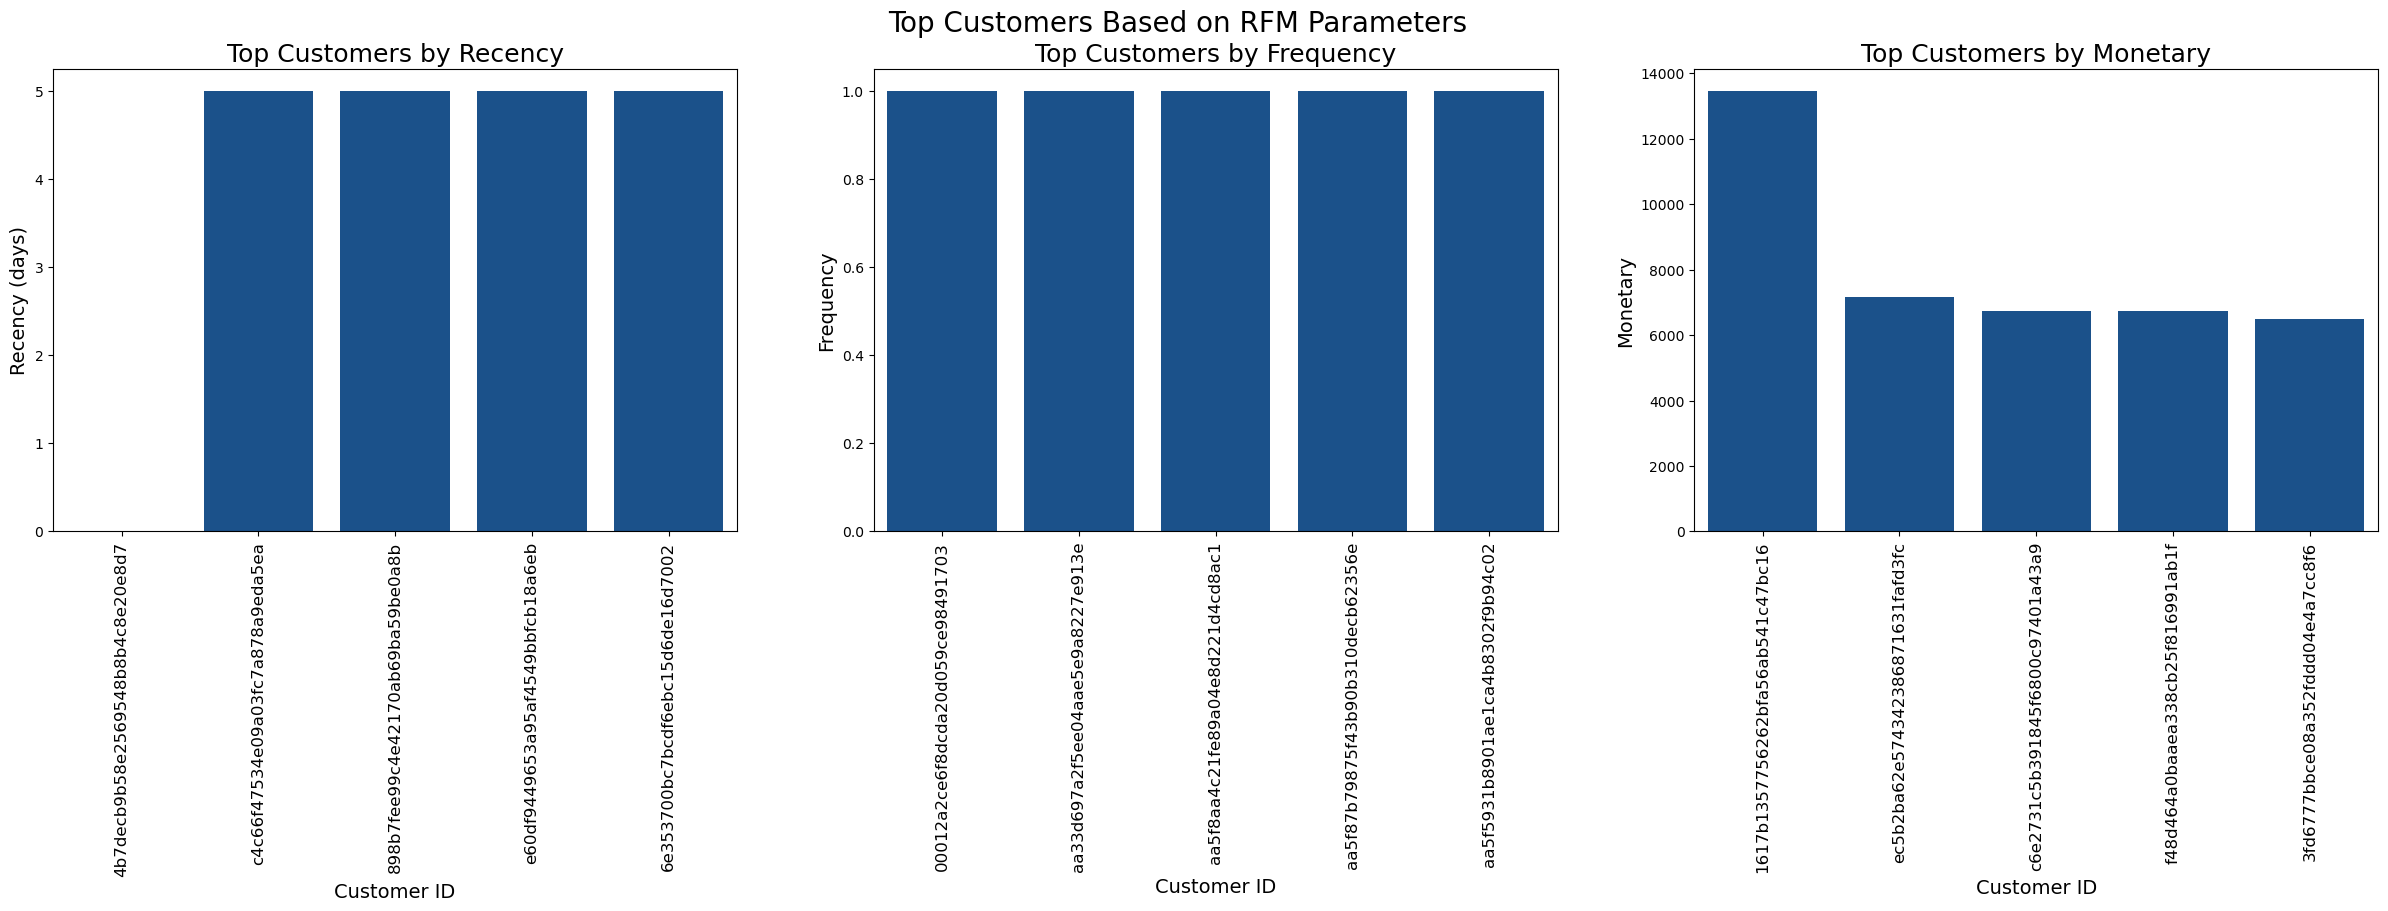

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#08519c"]

# Plot by Recency
recency_data = rfm_df.sort_values(by="recency", ascending=True).head(5)
sns.barplot(y="recency", x="customer_id", data=recency_data, palette=colors, ax=ax[0])
ax[0].set_ylabel("Recency (days)", fontsize=14)
ax[0].set_xlabel("Customer ID", fontsize=14)
ax[0].set_title("Top Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelrotation=90, labelsize=12)

# Plot by Frequency
frequency_data = rfm_df.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(y="frequency", x="customer_id", data=frequency_data, palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency", fontsize=14)
ax[1].set_xlabel("Customer ID", fontsize=14)
ax[1].set_title("Top Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=12)

# Plot by Monetary
monetary_data = rfm_df.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(y="monetary", x="customer_id", data=monetary_data, palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary", fontsize=14)
ax[2].set_xlabel("Customer ID", fontsize=14)
ax[2].set_title("Top Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=90, labelsize=12)

plt.suptitle("Top Customers Based on RFM Parameters", fontsize=20)

From the visualization of the data presented above, we can observe a selection of top-tier customers based on these three parameters as mentioned earlier. This information naturally assists us in addressing the final set of analytical inquiries. Visual representations in the RFM analysis not only empower us to identify key customer segments but also enable us to craft strategic approaches tailored to their specific characteristics, ultimately optimizing our marketing endeavors and bolstering overall business performance.

## Conclusion

### Question 1: What are the top five most significant demographic segments of customers, categorized by state?

The top five most significant demographic segments of customers categorized by state in Brazil are SP (São Paulo), RJ (Rio de Janeiro), MG (Minas Gerais), RS (Rio Grande do Sul), and PR (Paraná). Analyzing these segments provides valuable insights into regional customer preferences, aiding in the customization of strategies to better cater to their needs and enhance business performance.

### Question 2: What are the most and least sold products category?

The best-selling product category is "bed_bath_table," which recorded a total of 13,665 products sold. On the other hand, the category with the lowest sales is "security_and_services," having only 2 products sold. This information underscores the diverse levels of demand across various product categories, offering insights to guide the adjustment of marketing and inventory strategies appropriately.

### Question 3: When did the customer last make a transaction?

In [72]:
last_customers_transaction = rfm_df[['customer_id','max_order_timestamp']].to_csv('last_customers_transaction.csv')

The customers purchase period from `2016-9-4` to `2018-9-3`

### Question 4: How often has a customer made a purchase?

In [73]:
frequency_customer_purchase = rfm_df[['customer_id','frequency']].to_csv('frequency_customer_purchase.csv')

All customers only make a one-time purchase during the specific time period analyzed.

### Question 5: How much money did the customer spend?

In [74]:
customer_total_spending = rfm_df[['customer_id', 'monetary']].to_csv('customer_total_spending.csv')

In [75]:
mean_monetary = rfm_df['monetary'].mean()
min_monetary = rfm_df['monetary'].min()
max_monetary = rfm_df['monetary'].max()
std_monetary = rfm_df['monetary'].std()

sentence = "The average monetary value is {:.2f}, with a minimum of {:.2f}, a maximum of {:.2f}, and a standard deviation of {:.2f}.".format(mean_monetary, min_monetary, max_monetary, std_monetary)
print(sentence)

The average monetary value is 137.75, with a minimum of 0.85, a maximum of 13440.00, and a standard deviation of 210.65.


In [78]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   price                     112650 non-null  float64       
 4   freight_value             112650 non-null  float64       
 5   product_category_name     112650 non-null  object        
 6   customer_id               112650 non-null  object        
 7   customer_zip_code_prefix  112650 non-null  int64         
 8   customer_city             112650 non-null  object        
 9   customer_state            112650 non-null  object        
 10  order_status              112650 non-null  object        
 11  order_purchase_timestamp  112650 non-null  datetime64[ns]
dtypes: